In [44]:
from IPython.display import Math
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 7)

## Logistic Regression

* 선형 회귀 방식을 이용한 이진 분류 알고리즘
* 분류 레이블 : 0 or 1
* 0~1 범위를 예측 결과로 갖는 모델 필요
    * 가설 결과에 Sigmoid 함수 적용
* Logistic, sigmoid 함수
    * S자 모양의 함수

$\displaystyle s(z) = \frac{1}{1+e^{-z}}$

$z$ 값을 0과 1사이의 값으로 바꾸는 함수

**Sigmoid 함수 원리**

$\frac{1}{1} = 1$인데, 분모 1에다 0보다 크거나 같은 어떤 수를 더 하면 그 결과는 1 보다 클수 없다.

분모에 더 할 값은 $e^{-z}$, 이 값은 어떤 $z$가 주어져도 0보다 작아 지지 않는다.

$e^{-z}$는 $z$의 값이 크면 클 수록 0에 가까운 작은 수가 되고 $z$값이 작으면 무한대에 가까운 큰 수가 된다

따라서 $z$의 값이 크면 $e^{-z}$의 값이 작아져서 $\frac{1}{1+e^{-z}}$의 값은 1에 가까워 지고 그 반대는 0에 가까워 진다.

* sklearn API
    * `sklearn.linear_model.LogisticRegression`


## Sigmoid 함수 그리기

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def sigmoid(z):
    return  1/(1+np.exp(-z))

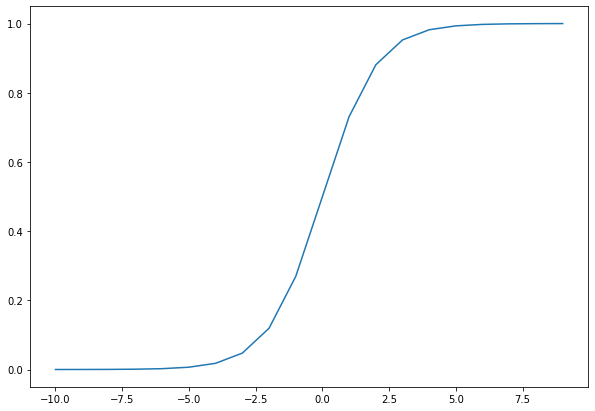

In [47]:
plt.figure(figsize=(10, 7))

x = np.arange(-10, 10)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

## 로지스틱 회귀 실습: 랜덤수 분류

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 샘플 생성
ma, mb = 50, 50
m = ma + mb
Xa = np.random.randint(-50,0, (ma, 2))
Xb = np.random.randint(0,50, (mb, 2))
x = np.concatenate((Xa, Xb), axis=0).astype(np.float32)/100

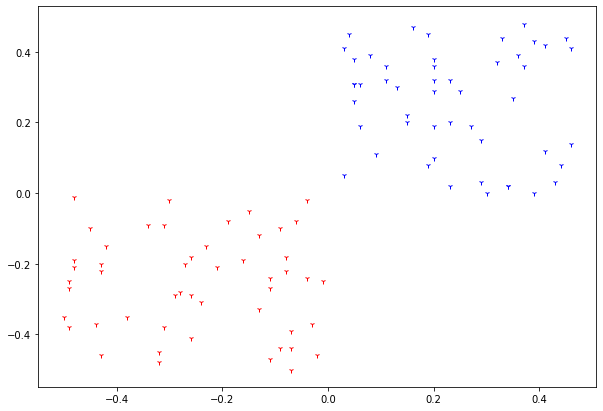

In [49]:
y = np.zeros((m,), dtype=np.float32)
y[mb:] = 1

plt.plot(x[y==0][:,0],x[y==0][:,1], 'r1')
plt.plot(x[y==1][:,0],x[y==1][:,1], 'b1')

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
# logistic regression
lr_clf = LogisticRegression()
lr_clf.fit(x, y)
predict = lr_clf.predict(x)

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
# accruracy_score (정확도 측정)
accuracy_score(y, predict)

1.0

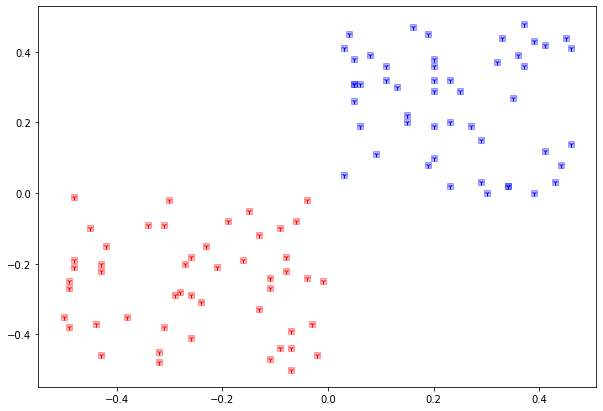

In [53]:
plt.plot(x[y==0][:,0],x[y==0][:,1], 'r1')
plt.plot(x[y==1][:,0],x[y==1][:,1], 'b1')

plt.plot(x[predict==0][:,0],x[predict==0][:,1], 'rs', alpha=0.3)
plt.plot(x[predict==1][:,0],x[predict==1][:,1], 'bs', alpha=0.3)

## 로지스틱 회귀 실습: 위스콘신 유방암 환자

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

In [55]:
# 데이터 셋 로드
cancer = load_breast_cancer()

In [56]:
# 데이터 프레임 만들기
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [57]:
# standardization
scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop('target', axis=1))

In [58]:
# train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(scaled, df['target'],  random_state=10)

In [59]:
# logistic regression
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_valid)

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
# 정확도 측정
accuracy_score(y_valid, pred)

0.958041958041958

## 오차 행렬 (Confision Matrix)

In [61]:
from sklearn.metrics import confusion_matrix
from IPython.display import Image

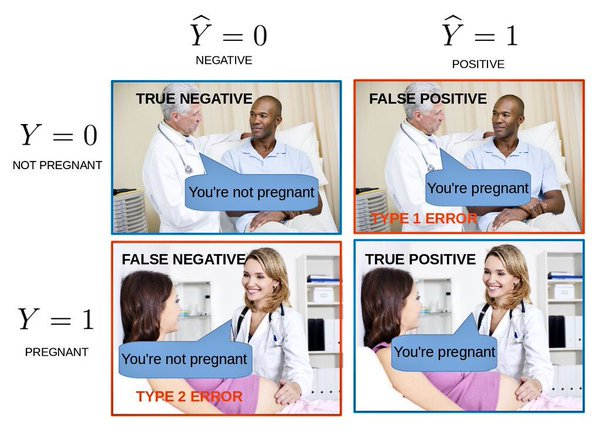

In [62]:
Image('https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg', width=700)

In [63]:
cm = confusion_matrix(y_valid, pred)

In [64]:
cm

array([[50,  2],
       [ 4, 87]])

In [65]:
import seaborn as sns

Text(69.0, 0.5, 'Actual')

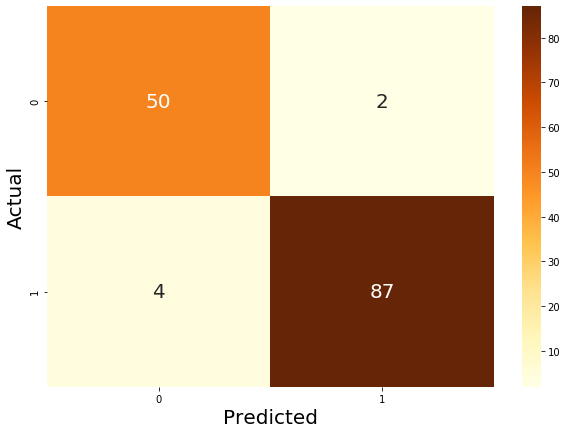

In [66]:
sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='YlOrBr')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

In [67]:
TN, FP, FN, TP = cm.ravel()

## 정밀도 (Precision)

Positive로 예측한 전체 건수에서 옳게 예측한 건수의 비율

- 중요 사례: 스팸 분류 (스팸으로 분류한 메일 중에서 중요 메일이 있는 경우

In [68]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [69]:
precision = TP / (FP + TP)

In [70]:
precision

0.9775280898876404

In [71]:
from sklearn.metrics import precision_score

In [72]:
precision_score(y_valid, pred)

0.9775280898876404

## 재현율 (Recall), 민감도

실제 Positive인 전체 건수에서 옳게 예측한 건수의 비율
- 중요 사례: 암 진단 (암 환자를 건강으로 분류하는 경우)
- TPR (True Positive Rate)

In [73]:
recall = TP / (FN + TP)

In [74]:
recall

0.9560439560439561

In [75]:
from sklearn.metrics import recall_score

In [76]:
recall_score(y_valid, pred)

0.9560439560439561

## F1 Score

재현율과 정밀도의 균형을 나타내는 수치

${F1 Score}=2*\: \frac{precision\:*\: recall}{precision+recall}$



In [77]:
2 * (precision * recall) / (precision + recall)

0.9666666666666667

In [78]:
from sklearn.metrics import f1_score

In [79]:
f1_score(y_valid, pred)

0.9666666666666667